# Импортируем библиотеки

In [114]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn  import datasets
from time import time
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.model_selection import train_test_split

# Методы обучения

In [115]:
def hierarchical(data, t=13, depth=10):
    t_start = time()
    Z = linkage(data, 'ward')
    clusters = fcluster(Z, t=t, depth=depth)
    print("Time:%s" % (time()-t_start))
    K = max(clusters) - min(clusters) + 1
    print("Количество кластеров", K)
    for i in range(min(clusters), max(clusters) + 1):
            plt.scatter(x=data.T[0][clusters == i], y=data.T[1][clusters == i])
    plt.show()
    return K

def kmeans(data, n):
    t_start = time()
    k_means = KMeans(n_clusters=n).fit(data)
    clusterization = k_means.predict(data)
    print("Time:%s" % (time()-t_start))
    for i in range(min(clusterization), max(clusterization) + 1):
        plt.scatter(x=data.T[0][clusterization == i], y=data.T[1][clusterization == i])

# Строим данные

In [116]:
def nearby_set(depth=10, mindots=60, maxdots=300, factor = 0.8):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(0, int(depth**0.5)):
        for j in range(0, int(depth**0.5)):
            count = np.random.randint(mindots, maxdots)
            X = np.array([np.random.ranf(count)*factor + i, np.random.ranf(count)*factor + j]).T
            y = np.array([int(depth**0.5)*i+j]*count)
            X_data = np.concatenate((X_data, X))
            y_data = np.concatenate((y_data, y))
    for i in range(0, depth - int(depth**0.5)**2):
        count = np.random.randint(mindots, maxdots)
        X = np.array([np.random.ranf(count)*factor + int(depth**0.5), np.random.ranf(count)*factor + i]).T
        y = np.array([int(depth**0.5)**2+i]*count)
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data

# Визуализация и подготовка данных

<font color = "grey"><font size = 6>Данные №1</font></font>

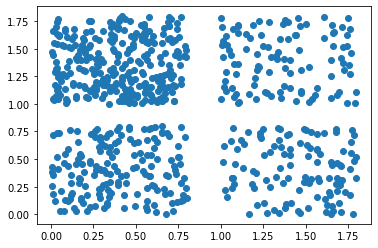

In [117]:
X_1= nearby_set(depth=4, factor = 0.8)
plt.scatter(X_1.T[0], X_1.T[1])
plt.show()

<font color = "grey"><font size = 6>Данные №2</font></font>

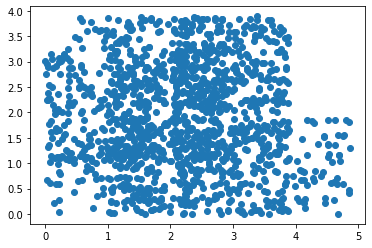

In [118]:
X_2= nearby_set(depth=10, factor = 1.9)
plt.scatter(X_2.T[0], X_2.T[1])
plt.show()

<font color = "grey"><font size = 6>Данные №3</font></font>

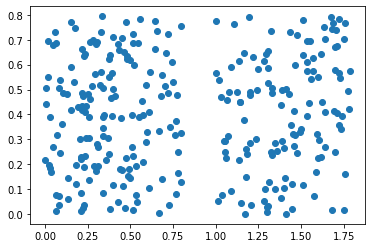

In [119]:
X_3= nearby_set(depth=2, factor = 0.8)
plt.scatter(X_3.T[0], X_3.T[1])
plt.show()

<font color = "grey"><font size = 6>Данные №4</font></font>

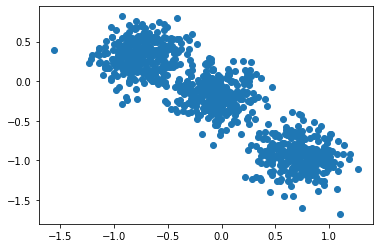

In [120]:
X_data = datasets.make_blobs(n_samples=np.random.randint(100, 1000), cluster_std=0.2, center_box=(-1, 1))[0]
link = linkage(X_data, 'ward')
X_4 = X_data
plt.scatter(X_data.T[0], X_data.T[1])
plt.show()

<font color = "grey"><font size = 6>Данные №5</font></font>

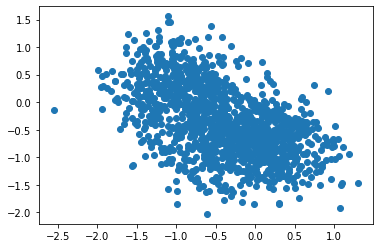

In [121]:
X_data = datasets.make_blobs(n_samples=np.random.randint(500, 1800), cluster_std=0.4, center_box=(-1, 1))[0]
link = linkage(X_data, 'ward')
X_5 = X_data
plt.scatter(X_data.T[0], X_data.T[1])
plt.show()

# Применение иерархической кластеризации и KMeans

<font color = "grey"><font size = 6>Иерархия и KMeans 1</font></font>

Time:0.010936260223388672
Количество кластеров 3


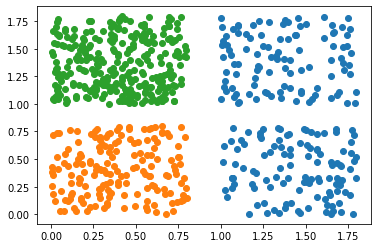

Time:0.025929689407348633


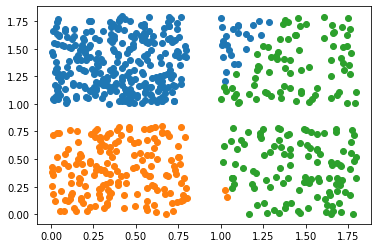

In [122]:
K_1 = hierarchical(X_1)
kmeans(X_1, K_1)

<font color = "grey"><font size = 6>Иерархия и KMeans 2</font></font>

Time:0.03593277931213379
Количество кластеров 4


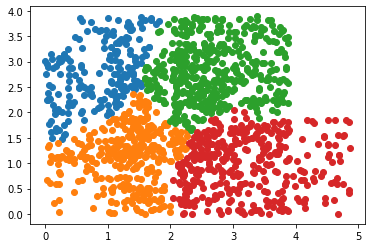

Time:0.05285787582397461


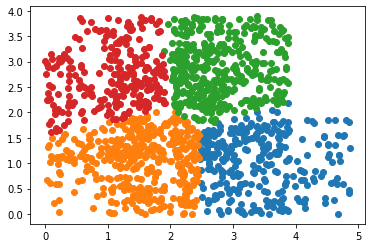

In [123]:
K_2 = hierarchical(X_2)
kmeans(X_2, K_2)

<font color = "grey"><font size = 6>Иерархия и KMeans 3</font></font>

Time:0.0019943714141845703
Количество кластеров 2


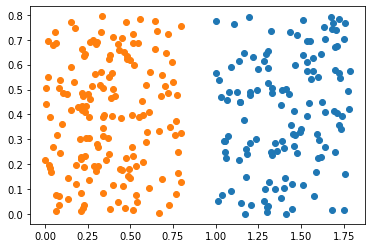

Time:0.01334381103515625


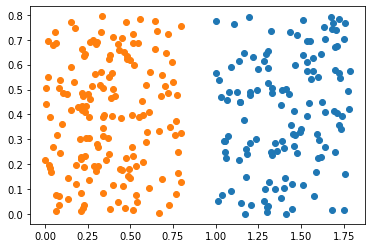

In [124]:
K_3 = hierarchical(X_3)
kmeans(X_3, K_3)

<font color = "grey"><font size = 6>Иерархия и KMeans 4</font></font>

Time:0.01795339584350586
Количество кластеров 3


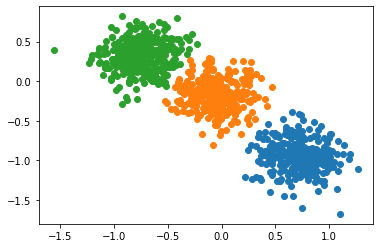

Time:0.01894998550415039


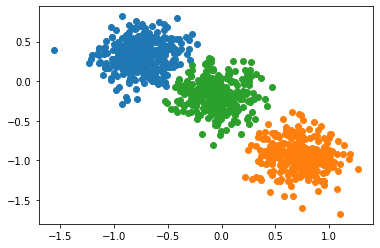

In [125]:
K_4 = hierarchical(X_4)
kmeans(X_4, K_4)

<font color = "grey"><font size = 6>Иерархия и KMeans 5</font></font>

Time:0.0359034538269043
Количество кластеров 4


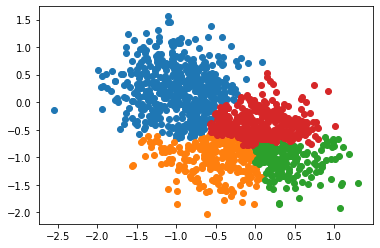

Time:0.06932640075683594


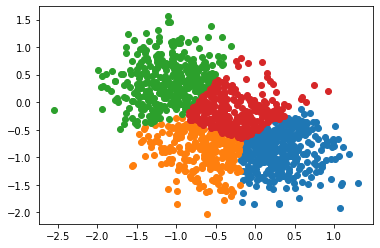

In [126]:
K_5 = hierarchical(X_5)
kmeans(X_5, K_5)

# Вывод

Заметим, что KMeans сработал вернее в заданиях, нежели SVM, хоть и за большее количество времени
<p></p>
Во 2 задании KMeans допущена ошибка, в то время как SVM сработал как надо
<p></p>
Из этого следует, что в определенных ситуациях KMeans дает сбои и не пригоден для использования
